# how do I use the initial condition to solve for a0 and a1?

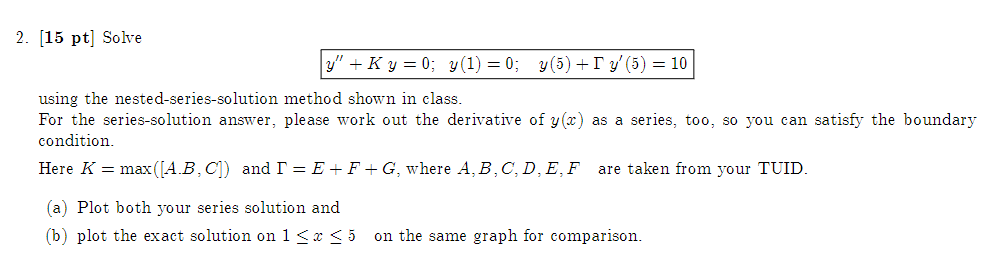

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
TUID = [9, 1, 5, 1, 8, 7, 2, 8, 9]
LETTER_MAP = ['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
total_sum = 0

for i in range(len(TUID)):
    total_sum += TUID[i]

average = total_sum / len(TUID)

print(f'my TUID average: {average}')

# Create a dictionary to map letters to integers
letter_to_int_map = {letter: integer for letter, integer in zip(LETTER_MAP, TUID)}

# Now, calculate the average of the letters of interest
K_letters = ["A", "B", "C"]
iota_letters = ["E", "F", "G"]

K = np.max([letter_to_int_map[letter] for letter in K_letters])
print(K)

iota = np.sum([letter_to_int_map[letter] for letter in iota_letters])
print(iota)


my TUID average: 5.555555555555555
9
14


### Nested Power Series Solutiuon

In [28]:
# Define the number of terms
P = 400

# Preallocate the array for the coefficients with zeros
a = np.zeros(P)

# Initial conditions
a[0] = 0
a[1] = 1

# Calculate the coefficients based on your provided pattern
for idx in range(2, P):
    if idx % 2 == 1:  # Odd n
        p = idx - 2
        a[idx] = -9 * a[p] / ((p + 2) * (p + 1))
        print(f"when p = {p}, a{idx} = {a[idx]}")
# Compute y(x) over the range 1<=x<=5
x_vals_power_series = np.linspace(1, 5, 400)
y_vals_power_series = sum([a[idx] * x_vals_power_series**n for n in range(P)])

when p = 1, a3 = -1.5
when p = 3, a5 = 0.675
when p = 5, a7 = -0.14464285714285716
when p = 7, a9 = 0.018080357142857145
when p = 9, a11 = -0.001479301948051948
when p = 11, a13 = 8.534434315684315e-05
when p = 13, a15 = -3.6576147067218492e-06
when p = 15, a17 = 1.2102401603123764e-07
when p = 17, a19 = -3.1848425271378325e-09
when p = 19, a21 = 6.824662558152499e-11
when p = 21, a23 = -1.2138727870231715e-12
when p = 23, a25 = 1.8208091805347573e-14
when p = 25, a27 = -2.33437074427533e-16
when p = 27, a29 = 2.5873567362657596e-18
when p = 29, a31 = -2.5038936157410577e-20
when p = 31, a33 = 2.1340002406884014e-22
when p = 33, a35 = -1.6139497618651774e-24
when p = 35, a37 = 1.0905065958548496e-26
when p = 37, a39 = -6.622509691426212e-29
when p = 39, a41 = 3.634304098953409e-31
when p = 41, a43 = -1.811114999478443e-33
when p = 43, a45 = 8.232340906720197e-36
when p = 45, a47 = -3.426968925091664e-38
when p = 47, a49 = 1.3113401499075245e-40
when p = 49, a51 = -4.6282593526147926e-4

### Exact Solution

In [29]:
# Given constants
K = 9
r = 14

# From the derived equation:
B = 10 / (np.sin(15) + 14 * 3 * np.cos(15))

# Define y(x) using derived B
def y(x):
    return B * np.sin(3*x)

# Generate x values
x_vals_exact = np.linspace(1, 5, 400)

# Calculate y values
y_vals_exact = y(x_vals_exact)


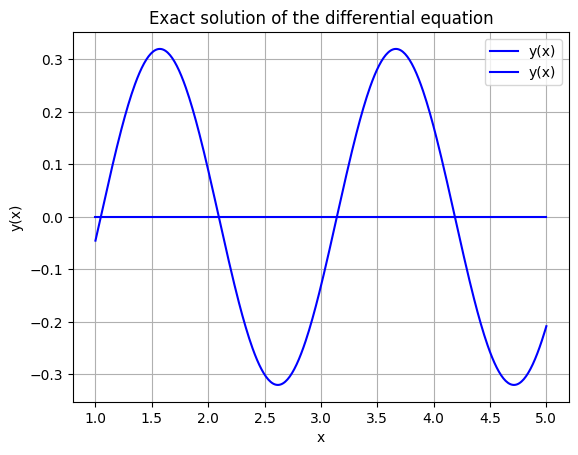

In [30]:
# Plot
plt.plot(x_vals_power_series, y_vals_power_series, label='y(x)', color='blue')
plt.plot(x_vals_exact, y_vals_exact, label='y(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Exact solution of the differential equation')
plt.legend()
plt.grid(True)
plt.show()